# Exploratory Data Analysis <hr style="border:2.5px solid rgb(134, 72, 72)"></hr>

Name: **Geo Angelo D. Butas** <br>
Course: **CPE2A**

# Set-Up

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [225]:
df = pd.read_csv("raw/chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [226]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


In [227]:
df_w = df.copy()

# Production Volume & Vendors

## Chip Production Volume

In [228]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [229]:
type(chip_count)

pandas.core.series.Series

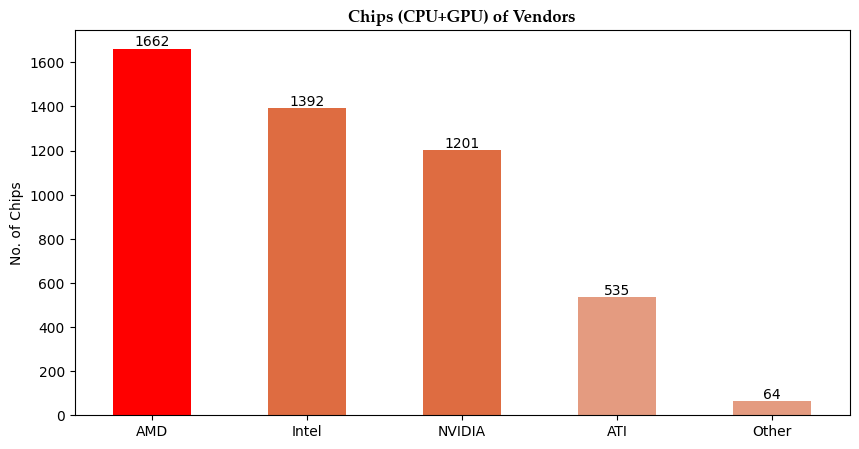

In [230]:
chart = chip_count.plot(kind='bar',
                        color = ['red','#de6c41','#de6c41','#e49b80','#e49b80'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips (CPU+GPU) of Vendors',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('No. of Chips')
plt.show()

## CPU Production Volume

In [231]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [232]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

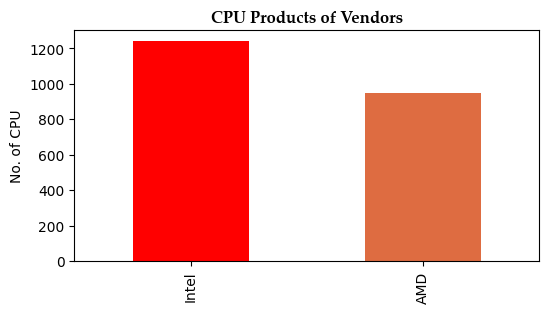

In [233]:
chart = cpu_count.plot(kind='bar',
                       figsize=(6,3),
                       color = ['red','#de6c41'])
plt.title('CPU Products of Vendors',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('No. of CPU')
plt.xlabel('')
plt.show()

## GPU Production Volume

In [234]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [235]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

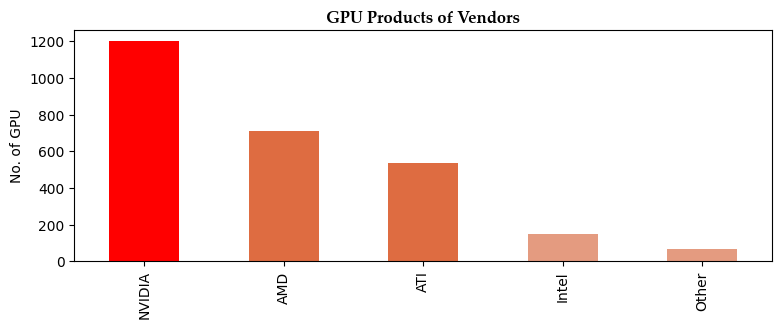

In [236]:
chart = gpu_count.plot(kind='bar',
                       figsize=(9,3),
                       color = ['red','#de6c41', '#de6c41', '#e49b80', '#e49b80'])
plt.title('GPU Products of Vendors',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('No. of GPU')
plt.xlabel('')
plt.show()

# No. of Chips Manufactured and Manufacturers

## Chips Manufactured

In [237]:
chip_manu = df_w['Foundry'].value_counts()
chip_manu

Foundry
TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

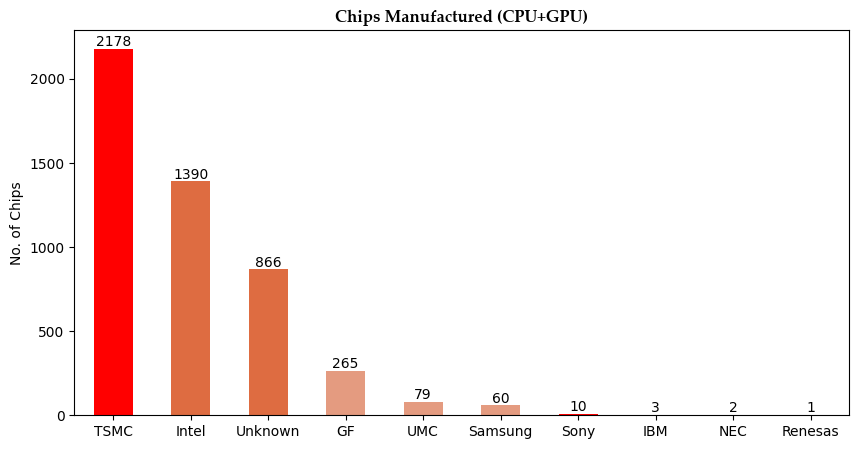

In [238]:
chart = chip_manu.plot(kind='bar',
                       color = ['red', '#de6c41', '#de6c41', '#e49b80', '#e49b80', '#e49b80'],
                       figsize=(10, 5))
chart.bar_label(chart.containers[0], label_type='edge')

plt.title('Chips Manufactured (CPU+GPU)', fontfamily='Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('No. of Chips')

chart.set_xticks(range(len(chip_manu)))
chart.set_xticklabels(chip_manu.index, rotation=0)

plt.show()


## GPU Manufactured 

In [239]:
gpu_manu = df_gpu['Foundry'].value_counts()
gpu_manu

Foundry
TSMC       2081
GF          172
Intel       148
Unknown     106
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

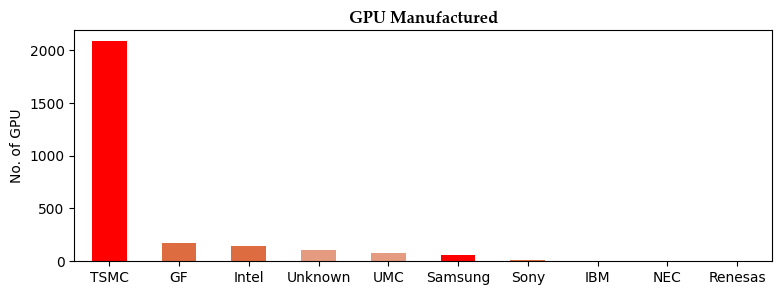

In [240]:
chart = gpu_manu.plot(kind='bar',
                       figsize=(9,3),
                       color = ['red','#de6c41', '#de6c41', '#e49b80', '#e49b80'])
plt.title('GPU Manufactured',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('No. of GPU')

plt.xlabel('')
chart.set_xticklabels(gpu_manu.index, rotation=0)
plt.show()

## CPU Manufactured

In [241]:
cpu_manu = df_cpu['Foundry'].value_counts()
cpu_manu

Foundry
Intel      1242
Unknown     760
TSMC         97
GF           93
Name: count, dtype: int64

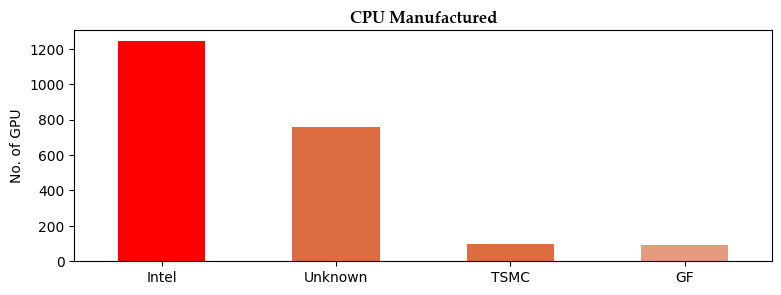

In [242]:
chart = cpu_manu.plot(kind='bar',
                       figsize=(9,3),
                       color = ['red','#de6c41', '#de6c41', '#e49b80'])
plt.title('CPU Manufactured',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('No. of GPU')
plt.xlabel('')
chart.set_xticklabels(cpu_manu.index, rotation=0)
plt.show()

# Thermal Design Power

## Lowest TDP (Thermal Design Power)

In [243]:
df_ctdp = df_w[['Product', 'Type', 'TDP']]
df_ctdp

,Product,Type,TDP
0,AMD Athlon 64 3500+,CPU,45.000000
1,AMD Athlon 200GE,CPU,35.000000
2,Intel Core i5-1145G7,CPU,28.000000
3,Intel Xeon E5-2603 v2,CPU,80.000000
4,AMD Phenom II X4 980 BE,CPU,125.000000
...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,75.000000
4850,Intel GMA 950,GPU,7.000000
4851,NVIDIA GeForce GT 320M,GPU,23.000000
4852,NVIDIA GeForce FX 5200,GPU,81.359981


In [244]:
df_ctdp = df_ctdp.sort_values(by='TDP')
df_ctdp

,Product,Type,TDP
2175,Intel Atom Z612,CPU,1.0
1964,Intel Atom Z600,CPU,1.0
469,Intel Atom Z620,CPU,1.0
1550,Intel Atom Z500,CPU,1.0
60,Intel Atom Z515,CPU,1.0
...,...,...,...
4605,NVIDIA Quadro Plex 2100 S4,GPU,640.0
2908,NVIDIA Tesla S1075,GPU,800.0
3603,NVIDIA Tesla S1070,GPU,800.0
4064,NVIDIA Tesla S870,GPU,800.0


In [245]:
df_ctdp = df_ctdp.head(7)
df_ctdp

,Product,Type,TDP
2175,Intel Atom Z612,CPU,1.0
1964,Intel Atom Z600,CPU,1.0
469,Intel Atom Z620,CPU,1.0
1550,Intel Atom Z500,CPU,1.0
60,Intel Atom Z515,CPU,1.0
1761,Intel Atom Z610,CPU,1.0
1424,Intel Atom Z510,CPU,2.0


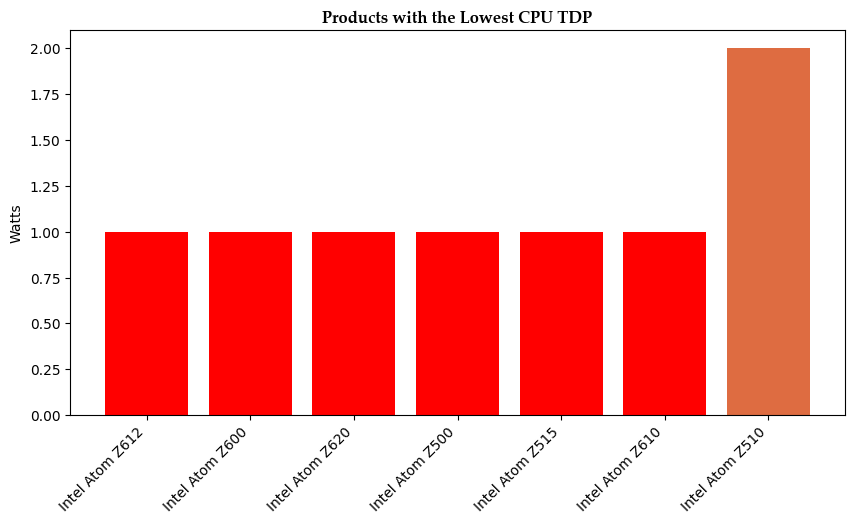

In [246]:
plt.figure(figsize=(10,5))
plt.bar(df_ctdp['Product'],
        df_ctdp['TDP'],
        color = ['red','red','red','red','red','red', '#de6c41'])
plt.title('Products with the Lowest CPU TDP',
        fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

Notably, the top 7 products with the lowest TDP are CPUs. 

## Highest TDP (Thermal Design Power)

In [247]:
df_htdp = df_w[['Product', 'Type', 'TDP']]
df_htdp

,Product,Type,TDP
0,AMD Athlon 64 3500+,CPU,45.000000
1,AMD Athlon 200GE,CPU,35.000000
2,Intel Core i5-1145G7,CPU,28.000000
3,Intel Xeon E5-2603 v2,CPU,80.000000
4,AMD Phenom II X4 980 BE,CPU,125.000000
...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,75.000000
4850,Intel GMA 950,GPU,7.000000
4851,NVIDIA GeForce GT 320M,GPU,23.000000
4852,NVIDIA GeForce FX 5200,GPU,81.359981


In [248]:
df_htdp = df_htdp.sort_values(by='TDP', ascending= False)
df_htdp

,Product,Type,TDP
4821,NVIDIA Tesla S2050,GPU,900.0
3603,NVIDIA Tesla S1070,GPU,800.0
4064,NVIDIA Tesla S870,GPU,800.0
2908,NVIDIA Tesla S1075,GPU,800.0
4420,NVIDIA Quadro Plex 1000 Model II,GPU,640.0
...,...,...,...
1550,Intel Atom Z500,CPU,1.0
1761,Intel Atom Z610,CPU,1.0
469,Intel Atom Z620,CPU,1.0
2175,Intel Atom Z612,CPU,1.0


In [249]:
df_htdp = df_htdp.head(7)
df_htdp

,Product,Type,TDP
4821,NVIDIA Tesla S2050,GPU,900.0
3603,NVIDIA Tesla S1070,GPU,800.0
4064,NVIDIA Tesla S870,GPU,800.0
2908,NVIDIA Tesla S1075,GPU,800.0
4420,NVIDIA Quadro Plex 1000 Model II,GPU,640.0
4735,NVIDIA Quadro Plex 2200 D2,GPU,640.0
2522,NVIDIA Quadro Plex 2100 D4,GPU,640.0


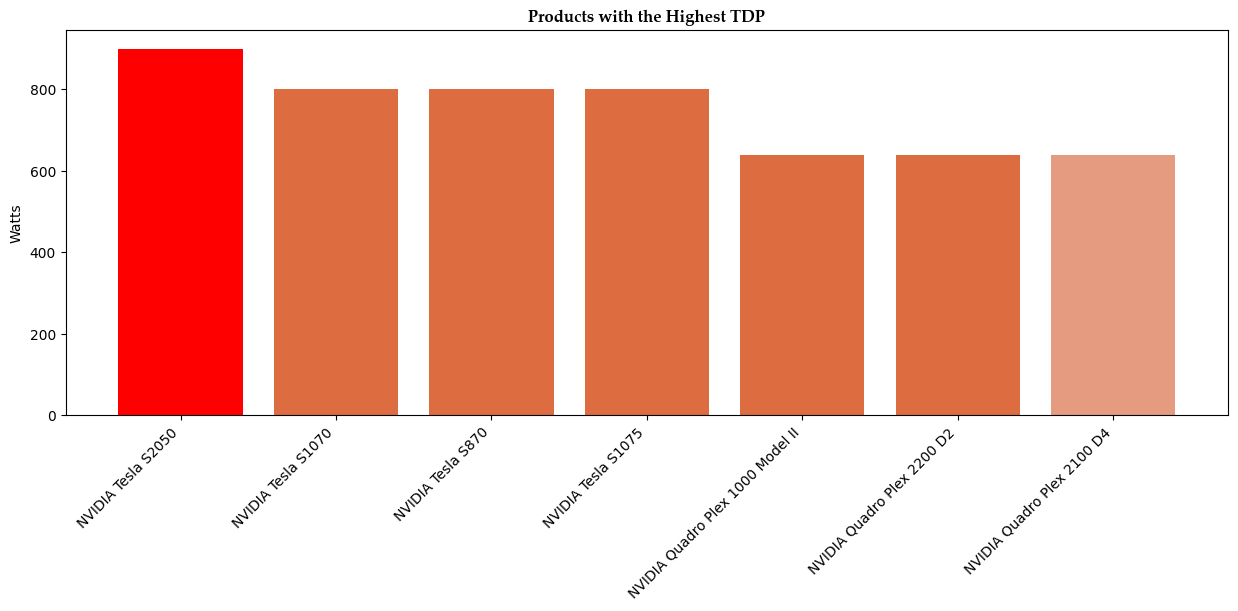

In [250]:
plt.figure(figsize=(15,5))
plt.bar(df_htdp['Product'],
        df_htdp['TDP'],
        color = ['red','#de6c41','#de6c41','#de6c41','#de6c41','#de6c41', '#e49b80'])
plt.title('Products with the Highest TDP',
        fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

Notably, the chips with the highest TDP are GPUs. 

## Chip TDP Trend Per Type

In [251]:
df_tdp = df[['Type', 'Date', 'TDP']].where(df['Type'].notna()).dropna()
df_tdp['Date'] = pd.to_datetime(df_tdp['Date'])
df_tdp['Year'] = df_tdp['Date'].dt.year
df_tdp


,Type,Date,TDP,Year
0,CPU,2007-02-20,45.000000,2007.0
1,CPU,2018-09-06,35.000000,2018.0
2,CPU,2020-09-02,28.000000,2020.0
3,CPU,2013-09-01,80.000000,2013.0
4,CPU,2011-05-03,125.000000,2011.0
...,...,...,...,...
4849,GPU,2011-02-22,75.000000,2011.0
4850,GPU,2005-06-01,7.000000,2005.0
4851,GPU,2010-03-03,23.000000,2010.0
4852,GPU,2003-03-06,81.359981,2003.0


In [252]:
df_tdp = df_tdp.groupby(['Year', 'Type'])['TDP'].mean().reset_index()
df_tdp



,Year,Type,TDP
0,2000.0,CPU,50.470588
1,2000.0,GPU,55.258657
2,2001.0,CPU,59.186047
3,2001.0,GPU,65.297946
4,2002.0,CPU,68.487179
5,2002.0,GPU,75.419693
6,2003.0,CPU,73.630137
7,2003.0,GPU,69.121414
8,2004.0,CPU,78.250000
9,2004.0,GPU,68.908296


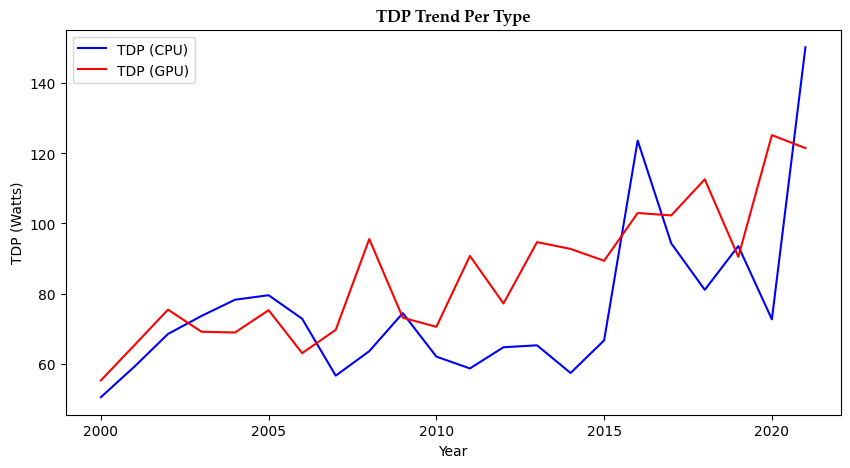

In [253]:
plt.figure(figsize=(10, 5))
for t in df_tdp['Type'].unique():
    data = df_tdp[df_tdp['Type'] == t]
    color = 'red' if t == 'GPU' else 'blue'
    plt.plot(data['Year'], data['TDP'], label=f'TDP ({t})', color=color)

plt.title('TDP Trend Per Type', 
          fontfamily='Palatino Linotype', 
          fontsize=12, 
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('TDP (Watts)')
plt.legend()
plt.show()

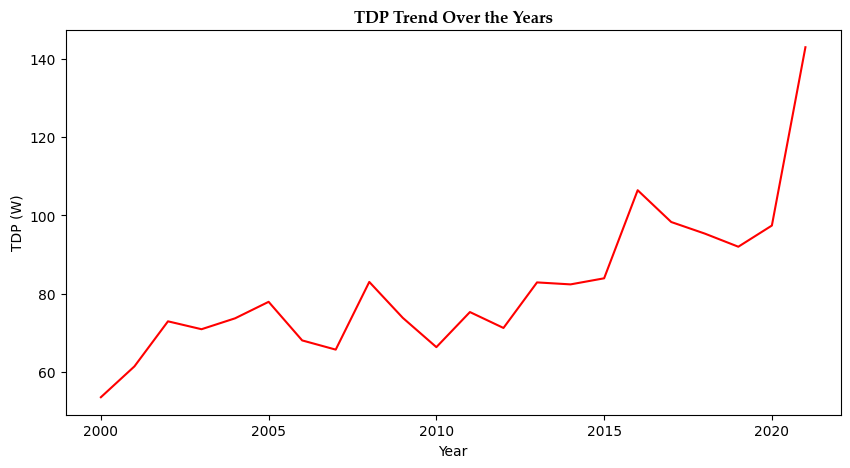

In [254]:
df_w['Date'] = pd.to_datetime(df_w['Date'])
df_w['Year'] = df_w['Date'].dt.year

df_gentdp = df_w.groupby('Year')['TDP'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_gentdp['Year'], df_gentdp['TDP'], color='red')
plt.title('TDP Trend Over the Years',
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('TDP (W)')
plt.show()


# Process Size, Transistors, Die Size, & Frequency Trends

## Chip Process Size Trend Per Type

In [255]:

df_process_size = df[['Type', 'Date', 'Process_Size']].where(df['Type'].notna()).dropna()
df_process_size['Date'] = pd.to_datetime(df_process_size['Date'])
df_process_size['Year'] = df_process_size['Date'].dt.year
df_process_size

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [256]:
df_process_size = df_process_size.groupby(['Year', 'Type'])['Process_Size'].mean().reset_index()
df_process_size


,Year,Type,Process_Size
0,2000.0,CPU,180.000000
1,2000.0,GPU,180.673973
2,2001.0,CPU,137.790698
3,2001.0,GPU,162.757339
4,2002.0,CPU,132.564103
5,2002.0,GPU,153.913043
6,2003.0,CPU,130.000000
7,2003.0,GPU,140.982143
8,2004.0,CPU,109.705882
9,2004.0,GPU,121.384615


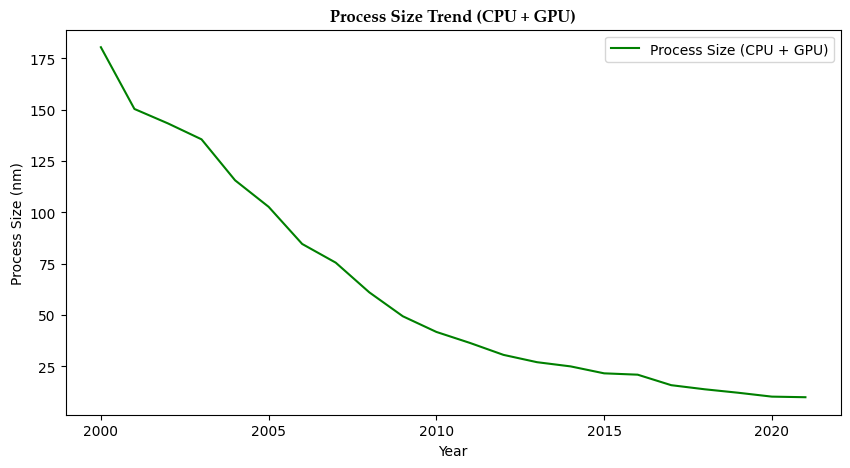

In [257]:
df_process_size_combined = df_process_size.groupby('Year')['Process_Size'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(df_process_size_combined['Year'], df_process_size_combined['Process_Size'], label='Process Size (CPU + GPU)', color='green')

plt.title('Process Size Trend (CPU + GPU)', 
          fontfamily='Palatino Linotype', 
          fontsize=12, 
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Process Size (nm)')
plt.legend()
plt.show()

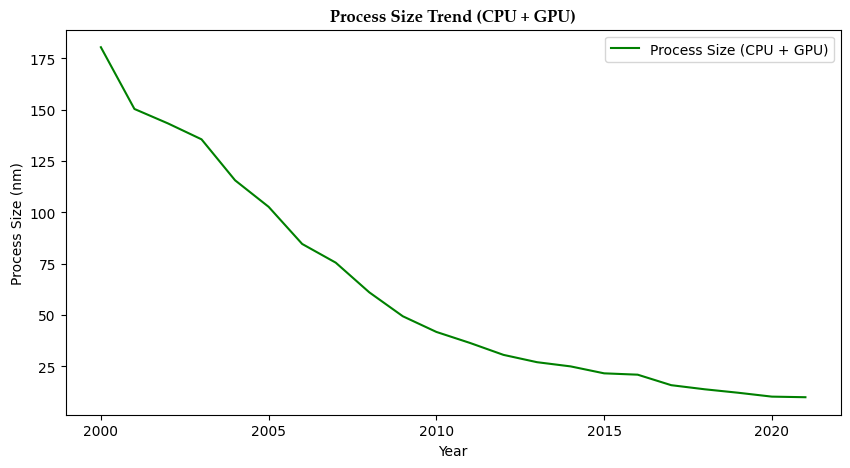

In [258]:

df_process_size_combined = df_process_size.groupby('Year')['Process_Size'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(df_process_size_combined['Year'], df_process_size_combined['Process_Size'], label='Process Size (CPU + GPU)', color='green')
plt.title('Process Size Trend (CPU + GPU)', 
          fontfamily='Palatino Linotype', 
          fontsize=12, 
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Process Size (nm)')
plt.legend()
plt.show()


Both GPUs and CPUs' process sizes go down in size as the years go by, but the differences have slowly become smaller and smaller later on. This indicates that the trend of lowering the proccess sizes of chips may soon hit its limit.

## No. of Transistors Trend

Changed colors to blue and red for more clarity in the same graph :)

In [259]:
df_transistors = df[['Type', 'Date', 'Transistors']].where(df['Type'].notna()).dropna()
df_transistors['Date'] = pd.to_datetime(df_transistors['Date'])
df_transistors['Year'] = df_transistors['Date'].dt.year
df_transistors


,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [260]:
df_transistors = df_transistors.groupby(['Year', 'Type'])['Transistors'].mean().reset_index()
df_transistors


,Year,Type,Transistors
0,2000.0,CPU,38.000000
1,2000.0,GPU,215.525561
2,2001.0,CPU,65.197674
3,2001.0,GPU,119.568256
4,2002.0,CPU,51.846154
5,2002.0,GPU,104.273110
6,2003.0,CPU,89.315068
7,2003.0,GPU,139.747224
8,2004.0,CPU,104.213235
9,2004.0,GPU,332.929494


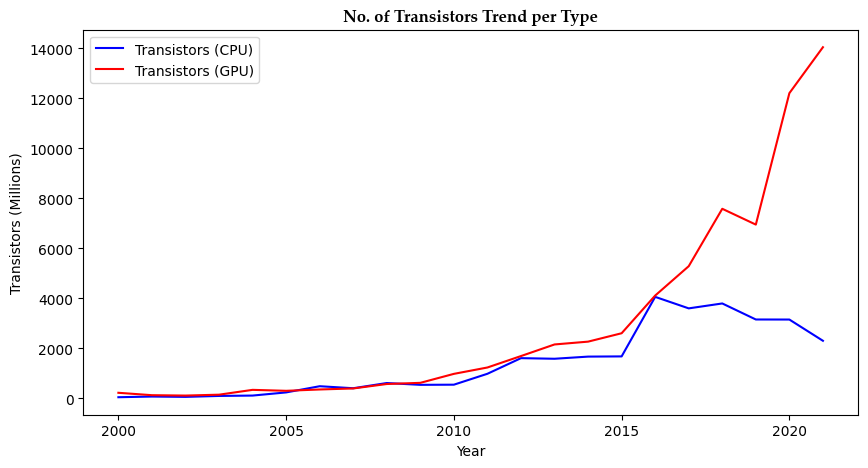

In [261]:
plt.figure(figsize=(10, 5))
for t in df_transistors['Type'].unique():
    df_type = df_transistors[df_transistors['Type'] == t]
    color = 'red' if t == 'GPU' else 'blue'
    plt.plot(df_type['Year'], df_type['Transistors'], label=f'Transistors ({t})', color=color)

plt.title('No. of Transistors Trend per Type', 
          fontfamily='Palatino Linotype', 
          fontsize=12, 
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Transistors (Millions)')
plt.legend()
plt.show()

## Die Size Trend per Type

In [262]:

df_die_size = df[['Type', 'Date', 'Die_Size']].where(df['Type'].notna()).dropna()
df_die_size['Date'] = pd.to_datetime(df_die_size['Date'])
df_die_size['Year'] = df_die_size['Date'].dt.year
df_die_size

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [263]:

df_die_size = df_die_size.groupby(['Year', 'Type'])['Die_Size'].mean().reset_index()
df_die_size

,Year,Type,Die_Size
0,2000.0,CPU,129.058824
1,2000.0,GPU,106.848015
2,2001.0,CPU,124.872093
3,2001.0,GPU,111.924925
4,2002.0,CPU,130.641026
5,2002.0,GPU,114.646995
6,2003.0,CPU,168.835123
7,2003.0,GPU,138.633286
8,2004.0,CPU,148.858889
9,2004.0,GPU,176.308971


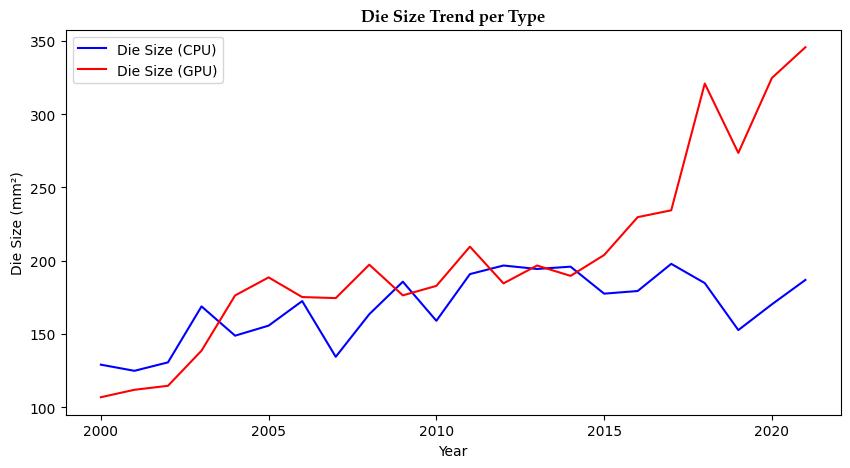

In [264]:

plt.figure(figsize=(10, 5))
for t in df_die_size['Type'].unique():
    df_type = df_die_size[df_die_size['Type'] == t]
    color = 'red' if t == 'GPU' else 'blue' 
    plt.plot(df_type['Year'], df_type['Die_Size'], label=f'Die Size ({t})', color=color)

plt.title('Die Size Trend per Type', 
          fontfamily='Palatino Linotype', 
          fontsize=12, 
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.legend()
plt.show()

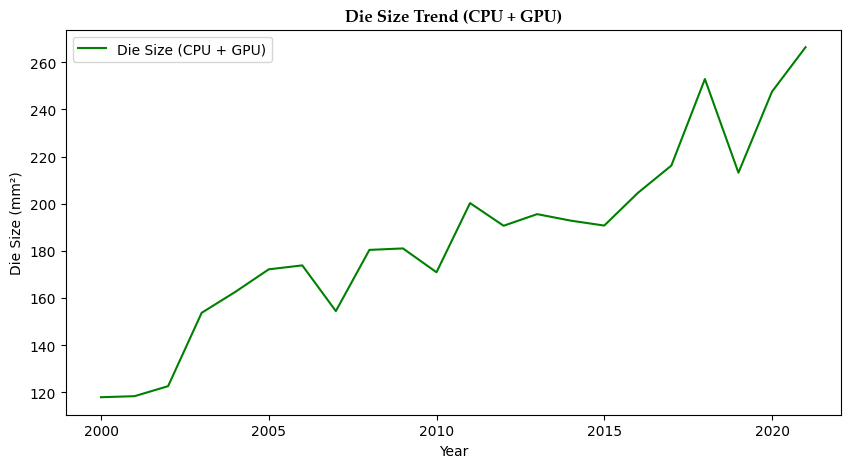

In [265]:
df_die_size = df_die_size.groupby(['Year'])['Die_Size'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_die_size['Year'], df_die_size['Die_Size'], label='Die Size (CPU + GPU)', color='green')

plt.title('Die Size Trend (CPU + GPU)', 
          fontfamily='Palatino Linotype', 
          fontsize=12, 
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.legend()
plt.show()

## Frequency per Type Trend


In [266]:
df_frequency = df[['Type', 'Date', 'Frequency']].where(df['Type'].notna()).dropna()
df_frequency['Date'] = pd.to_datetime(df_frequency['Date'])
df_frequency['Year'] = df_frequency['Date'].dt.year
df_frequency

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200,2007.0
1,CPU,2018-09-06,3200,2018.0
2,CPU,2020-09-02,2600,2020.0
3,CPU,2013-09-01,1800,2013.0
4,CPU,2011-05-03,3700,2011.0
...,...,...,...,...
4849,GPU,2011-02-22,450,2011.0
4850,GPU,2005-06-01,250,2005.0
4851,GPU,2010-03-03,500,2010.0
4852,GPU,2003-03-06,250,2003.0


In [267]:

df_frequency = df_frequency.groupby(['Year', 'Type'])['Frequency'].mean().reset_index()
df_frequency


,Year,Type,Frequency
0,2000.0,CPU,992.117647
1,2000.0,GPU,165.800000
2,2001.0,CPU,1801.662791
3,2001.0,GPU,196.061224
4,2002.0,CPU,2050.897436
5,2002.0,GPU,244.289855
6,2003.0,CPU,2155.369863
7,2003.0,GPU,304.803571
8,2004.0,CPU,2267.705882
9,2004.0,GPU,367.376923


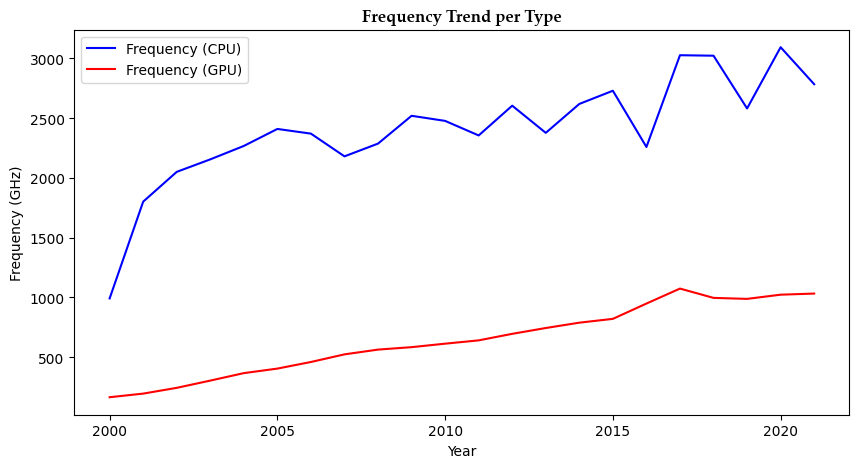

In [268]:
plt.figure(figsize=(10, 5))
for t in df_frequency['Type'].unique():
    df_type = df_frequency[df_frequency['Type'] == t]
    color = 'red' if t == 'GPU' else 'blue'
    plt.plot(df_type['Year'], df_type['Frequency'], label=f'Frequency ({t})', color=color)

plt.title('Frequency Trend per Type', 
          fontfamily='Palatino Linotype', 
          fontsize=12, 
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Frequency (GHz)')
plt.legend()
plt.show()

# Correlation between Specifications 

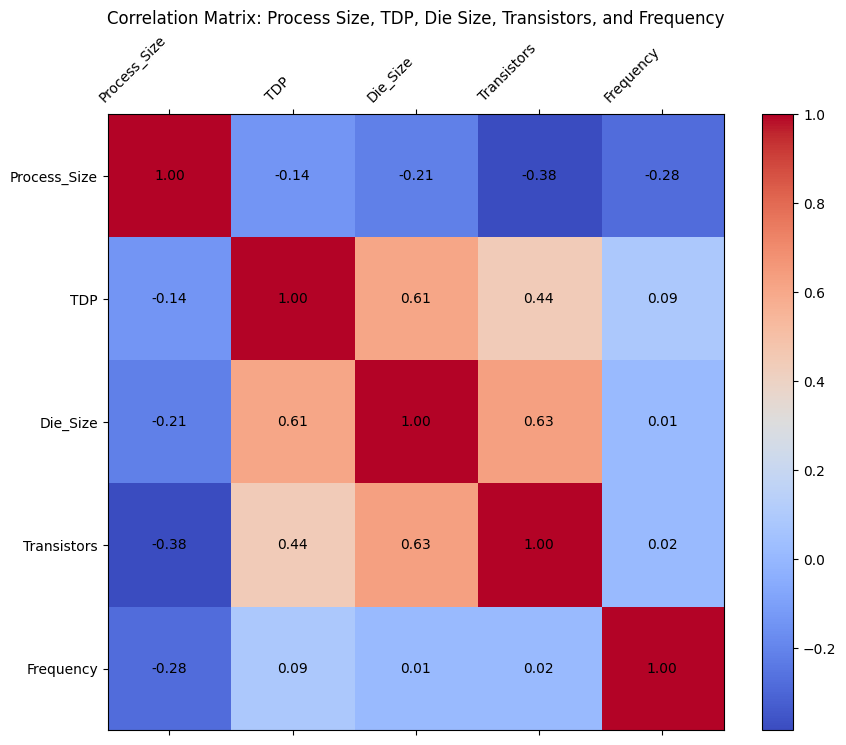

In [269]:
correlation_columns = ['Process_Size', 'TDP', 'Die_Size', 'Transistors', 'Frequency']
correlation_matrix = df_w[correlation_columns].corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(correlation_columns)))
ax.set_yticks(np.arange(len(correlation_columns)))

ax.set_xticklabels(correlation_columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_columns)

for i in range(len(correlation_columns)):
    for j in range(len(correlation_columns)):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix: Process Size, TDP, Die Size, Transistors, and Frequency')
plt.show()



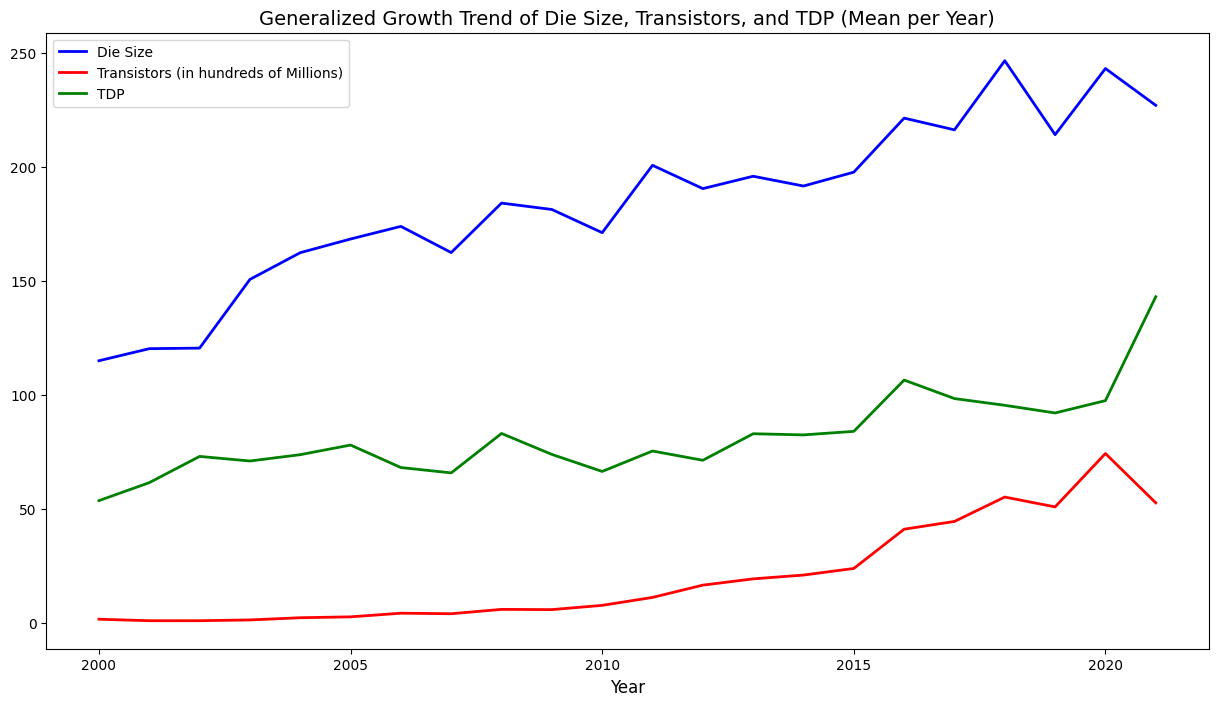

In [270]:
df_fp = df_w.dropna(subset=['Die_Size', 'Transistors', 'TDP', 'Date'])

df_fp.loc[:, 'Date'] = pd.to_datetime(df_fp['Date'])

df_fp.loc[:, 'Year'] = df_fp['Date'].dt.year

df_yearly_mean = df_fp.groupby('Year')[['Die_Size', 'Transistors', 'TDP']].mean().reset_index()

df_yearly_mean['Transistors'] = df_yearly_mean['Transistors'] / 100  

plt.figure(figsize=(15, 8))

plt.plot(df_yearly_mean['Year'], df_yearly_mean['Die_Size'], label='Die Size', color='blue', linestyle='-', linewidth=2)

plt.plot(df_yearly_mean['Year'], df_yearly_mean['Transistors'], label='Transistors (in hundreds of Millions)', color='red', linestyle='-', linewidth=2)

plt.plot(df_yearly_mean['Year'], df_yearly_mean['TDP'], label='TDP', color='green', linestyle='-', linewidth=2)

plt.title('Generalized Growth Trend of Die Size, Transistors, and TDP (Mean per Year)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.legend()

plt.show()


# Findings

### Vendors & Production Volume
- AMD is the largest chip vendor overall, but Intel leads in CPU production, while NVIDIA dominates the GPU market. These companies will set the trend in the market.

### Manufacturers & No. of Chips Manufactured
- Taiwan Semiconductor Manufacturing (TSMC) is the largest chip manufacturer overall and in GPU production, while Intel dominates CPU manufacturing.

### Thermal Design Power (TDP)
- CPUs are more efficient with lower TDP, while GPUs consume more power for higher performance. TDP values have risen over time for both types.

### Process Size
- Process size has been shrinking, but the rate of decrease is slowing as miniaturization approaches its limits.

### Transistor Count
- GPUs saw a sharp increase in transistor count during 2015-2017 while CPU transistor growth slowed due to diminishing returns.

### Die Size
- Die sizes shrank from 2000-2010 but began stabilizing or increasing in the 2010s.

### Frequency
- GPUs have lower frequencies than CPUs, reflecting their design for parallel tasks vs. single-threaded performance.

### Correlation between Specifications
- Die size, transistor count, and TDP are positively correlated, meaning increases in one often lead to increases in the others, although not perfectly.

---

# Summary & Conclusion

The analysis highlights several key trends within the chip manufacturing market over recent years. There has been a noticeable shift from shrinking process sizes to an emphasis on increasing chip complexity. GPUs have experienced a substantial increase in transistor counts and power consumption while CPUs have largely plateaued, with the mean transistor count of the latter even decreasing later on.

Furthermore, die sizes and TDP values exhibit inconsistent but generally increasing trends over time, suggesting a greater focus on integrating multiple components into larger chips or adopting multi-chip modules. The trend suggests that traditional methods of miniaturization are approaching their practical limits.

---

# Recommendations

### Analyze The Big Vendors
- AMD, Intel, and Nvidia are the largest manufacturers in the market, which means they are commonly the trendsetters. Understanding them is crucial to understanding the market.

### Consider the Manufacturers
- While not as ‘popular’ as the vendors, manufacturers are the lifeblood of the industry. They enable the mass production of products, making them a critical part of the market to consider when analyzing trends.

### Optimization of Thermal Design Power (TDP)
- Both CPUs and GPUs are showing rising TDP values over time. As the trend for higher TDPs continues, it will be essential for manufacturers to focus on optimizing heat dissipation and power efficiency.

### Process Size Optimization, Not Miniaturization
- The miniaturization of chips has largely hit a plateau. Therefore, it is recommended that manufacturers focus on architectural efficiency and optimization of the chips rather than further miniaturization.

### Targeted Development for GPUs (Increased Transistor Count)
- Given the rapid increase in transistor count in GPUs, the demand for GPU performance is expanding. Manufacturers may want to focus on further increasing transistor density in GPUs.

### Related Development of TDP, Die Size, and Transistor Count
- Due to the positive correlation of the three specifications, it would be wise to consider the relationships between these variables when focusing on one specific aspect.
